## Exercise/Example: the biggest Earthquake in the UK this Century

### The Problem

GeoJSON is a json-based file format for sharing geographic data. One example dataset is the USGS earthquake data:

In [1]:
import requests
quakes=requests.get("http://earthquake.usgs.gov/fdsnws/event/1/query.geojson",
                    params={
        'starttime':"2000-01-01",
        "maxlatitude":"58.723",
        "minlatitude":"50.008",
        "maxlongitude":"1.67",
        "minlongitude":"-9.756",
        "minmagnitude":"1",
        "endtime":"2016-10-27",
        "orderby":"time-asc"}
                   )

In [8]:
print(quakes.text[0:100])
print(quakes.text[101:200])
print(quakes.text[201:300])
print(quakes.text[301:400])
print(quakes.text[401:500])
print(quakes.text[501:600])
print(quakes.text[601:700])
print(quakes.text[701:800])

{"type":"FeatureCollection","metadata":{"generated":1509711786000,"url":"https://earthquake.usgs.gov
fdsnws/event/1/query.geojson?starttime=2000-01-01&maxlatitude=58.723&minlatitude=50.008&maxlongitud
=1.67&minlongitude=-9.756&minmagnitude=1&endtime=2016-10-27&orderby=time-asc","title":"USGS Earthqu
kes","status":200,"api":"1.5.8","count":111},"features":[{"type":"Feature","properties":{"mag":2.6,
place":"England, United Kingdom","time":956553055700,"updated":1415322596133,"tz":null,"url":"https
//earthquake.usgs.gov/earthquakes/eventpage/usp0009rst","detail":"https://earthquake.usgs.gov/fdsnw
/event/1/query?eventid=usp0009rst&format=geojson","felt":null,"cdi":null,"mmi":null,"alert":null,"s
atus":"reviewed","tsunami":0,"sig":104,"net":"us","code":"p0009rst","ids":",usp0009rst,","sources":


Your exercise: determine the location of the largest magnitude earthquake in the UK this century.

You'll need to:
* Get the text of the web result
* Parse the data as JSON
* Understand how the data is structured into dictionaries and lists
   * Where is the magnitude?
   * Where is the place description or coordinates?
* Program a search through all the quakes to find the biggest quake.
* Find the place of the biggest quake
* Form a URL for Google Maps at that latitude and longitude: look back at the introductory example
* Display that image

In [88]:
import json

quake_dict = json.loads(quakes.text)
magnitudes = [x['properties']['mag'] for x in quake_dict['features']]
max_mag_idx = magnitudes.index(max(magnitudes))
place = quake_dict['features'][max_mag_idx]['properties']['place']
coords = quake_dict['features'][max_mag_idx]['geometry']['coordinates']
print(place)
quake_dict['features'][max_mag_idx]

England, United Kingdom


{'geometry': {'coordinates': [-2.15, 52.52, 9.4], 'type': 'Point'},
 'id': 'usp000bcxg',
 'properties': {'alert': None,
  'cdi': None,
  'code': 'p000bcxg',
  'detail': 'https://earthquake.usgs.gov/fdsnws/event/1/query?eventid=usp000bcxg&format=geojson',
  'dmin': None,
  'felt': None,
  'gap': None,
  'ids': ',usp000bcxg,atlas20020922235314,',
  'mag': 4.8,
  'magType': 'mb',
  'mmi': 6.1,
  'net': 'us',
  'nst': 268,
  'place': 'England, United Kingdom',
  'rms': None,
  'sig': 354,
  'sources': ',us,atlas,',
  'status': 'reviewed',
  'time': 1032738794600,
  'title': 'M 4.8 - England, United Kingdom',
  'tsunami': 0,
  'type': 'earthquake',
  'types': ',impact-text,origin,phase-data,shakemap,trump-shakemap,',
  'tz': None,
  'updated': 1493229637141,
  'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/usp000bcxg'},
 'type': 'Feature'}

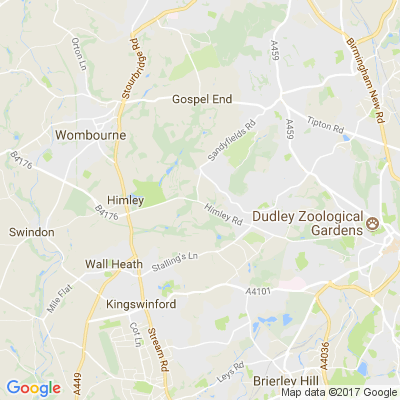

In [92]:
import requests
import IPython

def request_map_at(lat,long, satellite=False,zoom=12,size=(400,400),sensor=False):
  base="http://maps.googleapis.com/maps/api/staticmap?"
  
  params=dict(
    sensor= str(sensor).lower(),
    zoom= zoom,
    size= "x".join(map(str,size)),
    center= ",".join(map(str,(lat,long)))
  )
  if satellite:
    params["maptype"]="satellite"

  return requests.get(base,params=params)

map_png = request_map_at(coords[1], coords[0]).content
IPython.core.display.Image(map_png)